## Marketing Campaign Analysis
In this notebook we will analyze data for old Marketing Campaigns.
The goal is to maximize the profit for future campaigns by understanding customers response for old ones.
We are going to answer these questions
1. Load and clean Data
2. Customer Insights
    1. Age
    2. Gender
    3. Income
3. Campaign Analysis
   1. Conversion per Channel
   2. AdSpend on Channel
   3. Loyality per Channel
4. TODOOOOOOO Conversion vs previousPurchases - visits & time on site vs conversion


This is the dataset we are using https://www.kaggle.com/datasets/rabieelkharoua/predict-conversion-in-digital-marketing-dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("digital_marketing_campaign_dataset.csv")
df.head()
df.describe()


,CustomerID,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,11999.50000,43.625500,84664.196750,5000.944830,0.154829,0.104389,24.751625,5.549299,7.727718,49.799750,9.476875,4.467375,4.485500,2490.268500,0.876500
std,2309.54541,14.902785,37580.387945,2838.038153,0.084007,0.054878,14.312269,2.607358,4.228218,28.901165,5.711111,2.856564,2.888093,1429.527162,0.329031
min,8000.00000,18.000000,20014.000000,100.054813,0.010005,0.010018,0.000000,1.000428,0.501669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9999.75000,31.000000,51744.500000,2523.221165,0.082635,0.056410,13.000000,3.302479,4.068340,25.000000,5.000000,2.000000,2.000000,1254.750000,1.000000
50%,11999.50000,43.000000,84926.500000,5013.440044,0.154505,0.104046,25.000000,5.534257,7.682956,50.000000,9.000000,4.000000,4.000000,2497.000000,1.000000
75%,13999.25000,56.000000,116815.750000,7407.989369,0.228207,0.152077,37.000000,7.835756,11.481468,75.000000,14.000000,7.000000,7.000000,3702.250000,1.000000
max,15999.00000,69.000000,149986.000000,9997.914781,0.299968,0.199995,49.000000,9.999055,14.995311,99.000000,19.000000,9.000000,9.000000,4999.000000,1.000000


In [2]:
df.describe(include=[object])  


,Gender,CampaignChannel,CampaignType,AdvertisingPlatform,AdvertisingTool
count,8000,8000,8000,8000,8000
unique,2,5,4,1,1
top,Female,Referral,Conversion,IsConfid,ToolConfid
freq,4839,1719,2077,8000,8000


### 2. Customer Insights
    2.1. Age
    2.2. Gender
    2.3. Income

### Customer Insights
1. Age


In [4]:
print(df["CustomerID"].unique().size)

[ 8000  8001  8002 ... 15997 15998 15999]


<Axes: xlabel='Age', ylabel='Count'>

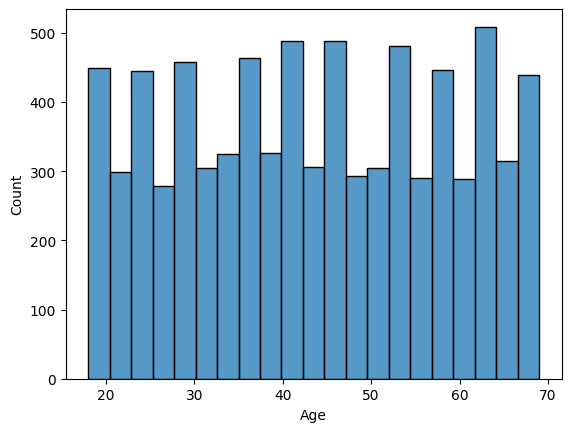

In [4]:
sns.histplot(data=df, x="Age")


It seem majority of customers have high education
and it seems the higher the education, the higher the income the higher spent

<Axes: xlabel='Income', ylabel='Count'>

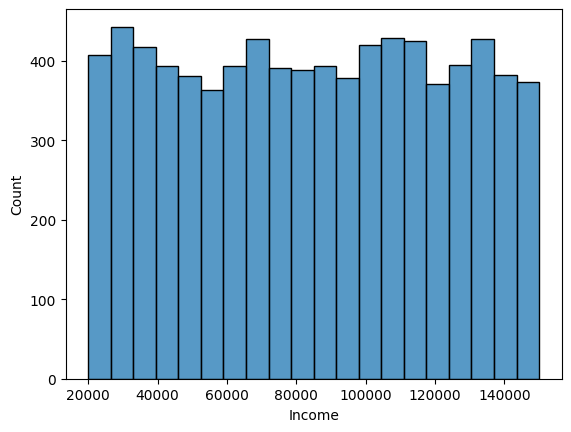

In [6]:
sns.histplot(data=df, x="Income")


### Campaign Analysis
- Campaign Type
- Campaign Channel

In [ ]:
sns.histplot(data=df, x="CampaignType")


In [ ]:
sns.histplot(data=df, x="CampaignChannel")


Let's see the most effective channel 

In [2]:
df['isConverted'] = ['Converted' if x > 0.5 else 'NotConverted' for x in df['Conversion']]

df["isConverted"].describe()

count          8000
unique            2
top       Converted
freq           7012
Name: isConverted, dtype: object

In [5]:
df.groupby(['CampaignChannel', 'isConverted']).size().rename('noOfCustomers').to_frame()

noOfCustomers
CampaignChannel isConverted                
Email           Converted              1355
                NotConverted            202
PPC             Converted              1461
                NotConverted            194
Referral        Converted              1518
                NotConverted            201
SEO             Converted              1359
                NotConverted            191
Social Media    Converted              1319
                NotConverted            200

It seems Referral is the most effective Campaign Channel followed by PPC

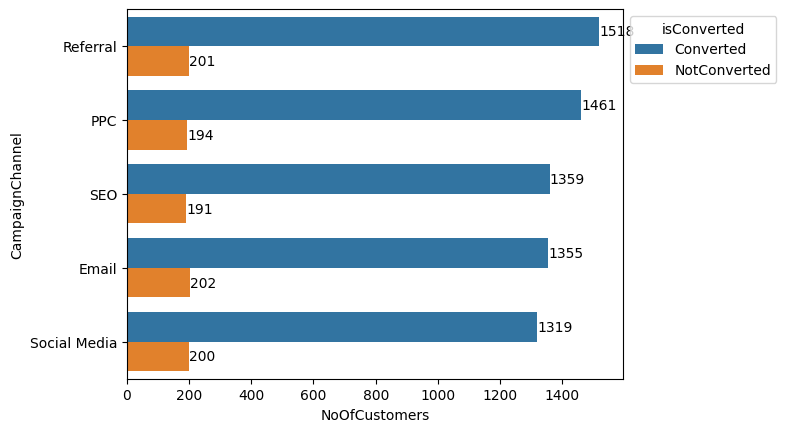

In [15]:
ax1 = sns.barplot(df.groupby(['CampaignChannel', 'isConverted']).size().rename('NoOfCustomers').sort_values(ascending=False).to_frame(), y="CampaignChannel", x="NoOfCustomers", hue="isConverted")
sns.move_legend(ax1, "upper left", bbox_to_anchor=(1, 1))
ax1.bar_label(ax1.containers[0], fontsize=10);
ax1.bar_label(ax1.containers[1], fontsize=10);



2. Amount spent on ads

<Axes: xlabel='AdSpend', ylabel='CampaignChannel'>

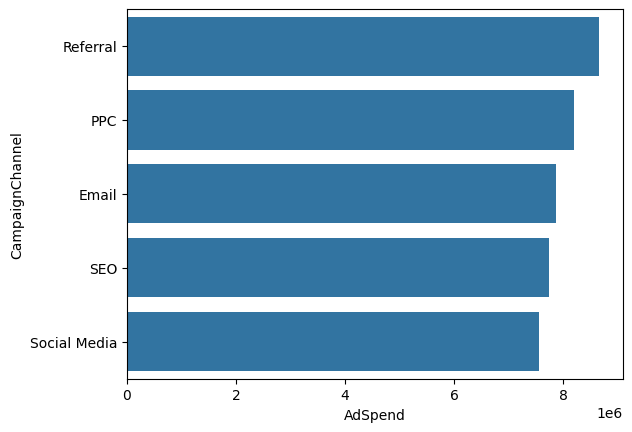

In [17]:
sns.barplot(df.groupby(['CampaignChannel'])['AdSpend'].sum().sort_values(ascending=False).to_frame(), y='CampaignChannel', x='AdSpend')

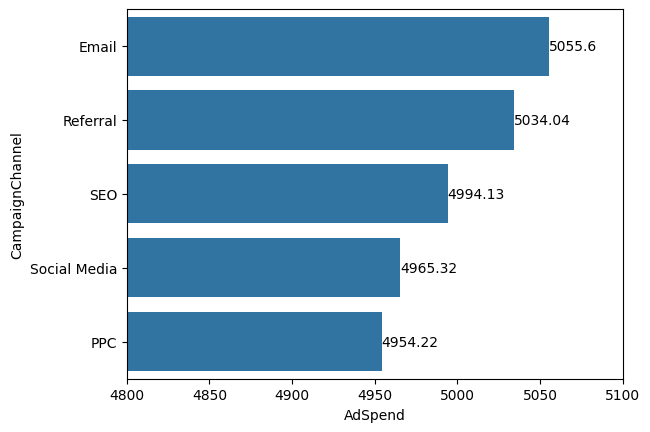

In [24]:
ax2 = sns.barplot(df.groupby(['CampaignChannel'])['AdSpend'].mean().sort_values(ascending=False).to_frame(), y='CampaignChannel', x='AdSpend')
plt.xlim(4800,5100)
ax2.bar_label(ax2.containers[0], fontsize=10);


<Axes: xlabel='LoyaltyPoints', ylabel='CampaignChannel'>

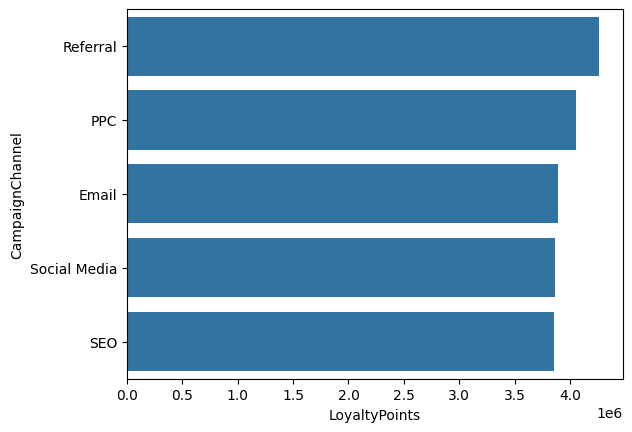

In [26]:
sns.barplot(df.groupby(['CampaignChannel'])['LoyaltyPoints'].sum().sort_values(ascending=False).to_frame(), y='CampaignChannel', x='LoyaltyPoints')

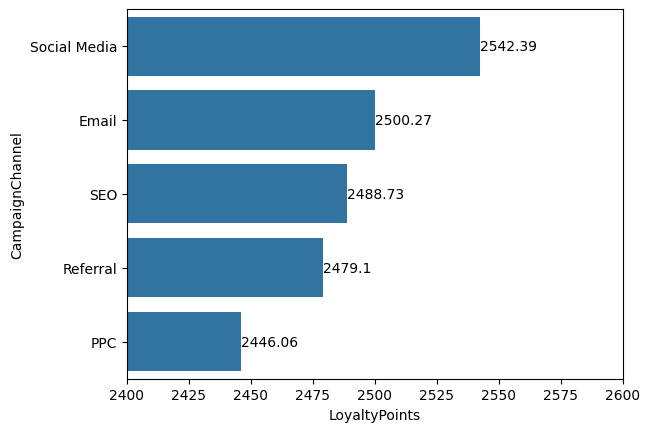

In [29]:
ax3 = sns.barplot(df.groupby(['CampaignChannel'])['LoyaltyPoints'].mean().sort_values(ascending=False).to_frame(), y='CampaignChannel', x='LoyaltyPoints')

plt.xlim(2400,2600)
ax3.bar_label(ax3.containers[0], fontsize=10);

Conversion vs previousPurchases 


In [ ]:
print('PreviousPurchases: ', df['ConversionRate'].corr(df['PreviousPurchases']))
print('WebsiteVisits: ', df['ConversionRate'].corr(df['WebsiteVisits']))
print('TimeOnSite: ', df['ConversionRate'].corr(df['TimeOnSite']))


visits & time on site vs conversion